In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

## a)

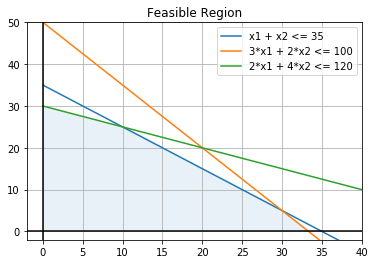

In [2]:
x = np.linspace(-0, 50, 100)
cons1 = (35 - x)
cons2 = (100 - 3*x)/2
cons3 = (120 - 2*x) / 4

plt.plot(x, cons1, label = 'x1 + x2 <= 35')
plt.plot(x, cons2, label = '3*x1 + 2*x2 <= 100')
plt.plot(x, cons3, label = '2*x1 + 4*x2 <= 120')
plt.fill_between(x, np.minimum(cons3, np.minimum(cons1, cons2)), 100*[0],
                 where = (np.minimum(cons1, cons2, cons3)>=0) & (x >= 0), alpha = .1)
plt.axhline(0, color='black')
plt.axvline(0, color='black')
plt.xlim(xmin = -2, xmax = 40)
plt.ylim(ymin = -2, ymax = 50)
plt.grid()
plt.legend()
plt.title('Feasible Region')


## b)
 
$x=[x_1, x_2, s_1, s_2, s_3]^T \\
c = [-2, -3, 0, 0, 0]^T \\
b=[35, 100, 120]^T \\
A = \begin{bmatrix}
    1       & 1 & 1 & 0 & 0 \\
    3       & 2 & 0 & 1 & 0 \\
    2      & 4 & 0 & 0 & 1
\end{bmatrix} \\
min\ c^Tx \\ 
s.t.\ Ax = b \\
\quad \ \ x >= 0 $  

## c)

In [3]:
# Use itertools for the built in combination iterators
import itertools

A = np.array([[1, 1, 1, 0, 0],
            [3, 2, 0, 1, 0],
            [2, 4, 0, 0, 1]])
c = np.array([-2, -3, 0, 0, 0])
b = np.array([35, 100, 120])

feasible_list = []
col_set = set(range(A.shape[1]))
coords = []
for basic_set in itertools.combinations(col_set, 3):
    
    non_basic = list(col_set - set(basic_set))
    basic = list(basic_set)
    basic_matrix = A[:, basic]
    basic_cost = c[basic]
    non_basic_cost = c[non_basic]
    full_x = np.zeros(5)
    basic_solutions = np.linalg.inv(basic_matrix).dot(b)
    full_x[basic] = basic_solutions
    coords.append((full_x[0], full_x[1]))
    
    print()
    print('Basic Indexes: ', basic)
    print('B =', basic_matrix)
    print('x_b = [x_%s, x_%s, x_%s] = ' % basic_set, basic_solutions)
    print('x_n = [x_%s, x_%s] = [0, 0]' % tuple(non_basic))
    print('x = ', full_x)




Basic Indexes:  [0, 1, 2]
B = [[1 1 1]
 [3 2 0]
 [2 4 0]]
x_b = [x_0, x_1, x_2] =  [ 20.  20.  -5.]
x_n = [x_3, x_4] = [0, 0]
x =  [ 20.  20.  -5.   0.   0.]

Basic Indexes:  [0, 1, 3]
B = [[1 1 0]
 [3 2 1]
 [2 4 0]]
x_b = [x_0, x_1, x_3] =  [ 10.  25.  20.]
x_n = [x_2, x_4] = [0, 0]
x =  [ 10.  25.   0.  20.   0.]

Basic Indexes:  [0, 1, 4]
B = [[1 1 0]
 [3 2 0]
 [2 4 1]]
x_b = [x_0, x_1, x_4] =  [ 30.   5.  40.]
x_n = [x_2, x_3] = [0, 0]
x =  [ 30.   5.   0.   0.  40.]

Basic Indexes:  [0, 2, 3]
B = [[1 1 0]
 [3 0 1]
 [2 0 0]]
x_b = [x_0, x_2, x_3] =  [ 60. -25. -80.]
x_n = [x_1, x_4] = [0, 0]
x =  [ 60.   0. -25. -80.   0.]

Basic Indexes:  [0, 2, 4]
B = [[1 1 0]
 [3 0 0]
 [2 0 1]]
x_b = [x_0, x_2, x_4] =  [ 33.33333333   1.66666667  53.33333333]
x_n = [x_1, x_3] = [0, 0]
x =  [ 33.33333333   0.           1.66666667   0.          53.33333333]

Basic Indexes:  [0, 3, 4]
B = [[1 0 0]
 [3 1 0]
 [2 0 1]]
x_b = [x_0, x_3, x_4] =  [ 35.  -5.  50.]
x_n = [x_1, x_2] = [0, 0]
x =  [ 35.   0

## d)

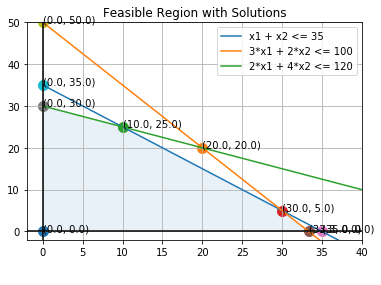

In [4]:
x = np.linspace(-0, 50, 100)
cons1 = (35 - x)
cons2 = (100 - 3*x)/2
cons3 = (120 - 2*x) / 4

plt.plot(x, cons1, label = 'x1 + x2 <= 35')
plt.plot(x, cons2, label = '3*x1 + 2*x2 <= 100')
plt.plot(x, cons3, label = '2*x1 + 4*x2 <= 120')
plt.fill_between(x, np.minimum(cons3, np.minimum(cons1, cons2)), 100*[0],
                 where = (np.minimum(cons1, cons2, cons3)>=0) & (x >= 0), alpha = .1)
plt.axhline(0, color='black')
plt.axvline(0, color='black')
plt.xlim(xmin = -2, xmax = 40)
plt.ylim(ymin = -2, ymax = 50)
plt.grid()
plt.legend()
plt.title('Feasible Region with Solutions')

for x, y in coords:
    plt.scatter([x], [y], s = 100)
    plt.annotate('(%.1f, %.1f)' % (x, y), (x, y))

Feasible Solutions:
    - [   0.    0.   35.  100.  120.]
    - [  0.  30.   5.  40.   0.]
    - [ 33.33333333   0.           1.66666667   0.          53.33333333]
    - [ 10.  25.   0.  20.   0.]
    
Infeasible Solutions:  
    - [ 20.  20.  -5.   0.   0.]
    - [ 30.   5.   0.   0.  40.]
    - [ 60.   0. -25. -80.   0.]
    - [  0.  50. -15.   0. -80.]
    - [ 35.   0.   0.  -5.  50.]
    - [  0.  50. -15.   0. -80.]
    - [  0.  35.   0.  30. -20.]